### Using Selenium we will download data from google and label it

#### Importing dependencies

In [31]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd
import time 

In [32]:
driver = webdriver.Chrome('/Users/utkarsh/PycharmProjects/chromedriver')
driver.implicitly_wait(30)

In [33]:
driver.set_page_load_timeout(10)

In [34]:
driver.get('https://google.com')

In [35]:
driver.execute_script("document.getElementsByName('q')[0].value='men haircut styles'")

In [36]:
driver.execute_script("document.getElementsByName('btnK')[1].click()")

In [37]:
import time 
time.sleep(5)
driver.execute_script("document.querySelector('.q.qs').click()")
time.sleep(2)
images=[]
img =driver.find_elements_by_tag_name('img')

soup_level1=BeautifulSoup(driver.page_source, 'lxml')

''
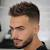

In [38]:
img[0].get_attribute('src')

In [39]:
import os
import errno
import base64
import requests
imageSourc=[]
for items in img:
    if 'rg_i Q4LuWd tx8vtf' in items.get_attribute('class'):
        if items.get_attribute('src') != None:
            imageSourc.append(items.get_attribute('src'))
for i,image in enumerate(imageSourc):
    filename = "hair/"
    if 'data' in image:
        # Separate the metadata from the image data
        head, data = image.split(',', 1)
        # Get the file extension (gif, jpeg, png)
        file_ext = head.split(';')[0].split('/')[1]
        # Decode the image data
        plain_data = base64.b64decode(data)
        
        if not os.path.exists(os.path.dirname(filename)):
            try:
                os.makedirs(os.path.dirname(filename))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise

        # Write the image to a file
        with open(filename+'hair'+str(i)+'.' + file_ext, 'wb') as f:
            f.write(plain_data)
    else:
        img_data = requests.get(image).content
        with open(filename+'hair'+str(i)+'.png', 'wb') as handler:
            handler.write(img_data)
